In [73]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np 

In [74]:
df = pd.read_csv('../Q6_data/Bank_Customer.csv')
df

TransactionID CustomerID CustomerDateOfBirth CustGender  \
0                  T1   C5841053             10/1/94          F   
1                  T2   C2142763              4/4/57          M   
2                  T3   C4417068            26/11/96          F   
3                  T4   C5342380             14/9/73          F   
4                  T5   C9031234             24/3/88          F   
...               ...        ...                 ...        ...   
1048562      T1048563   C8020229              8/4/90          M   
1048563      T1048564   C6459278             20/2/92          M   
1048564      T1048565   C6412354             18/5/89          M   
1048565      T1048566   C6420483             30/8/78          M   
1048566      T1048567   C8337524              5/3/84          M   

          CustLocation  CustAccountBalance TransactionDate  TransactionTime  \
0           JAMSHEDPUR            17819.05       2002/8/16           143207   
1              JHAJJAR             2270.69       2002/8/16           141858   
2               MUMBAI            17874.44       2002/8/16           142712   
3               MUMBAI           866503.21       2002/8/16           142714   
4          NAVI MUMBAI             6714.43       2002/8/16           181156   
...                ...                 ...             ...              ...   
1048562      NEW DELHI             7635.19       2018/9/16           184824   
1048563         NASHIK            27311.42       2018/9/16           183734   
1048564      HYDERABAD           221757.06       2018/9/16           183313   
1048565  VISAKHAPATNAM            10117.87       2018/9/16           184706   
1048566           PUNE            75734.42       2018/9/16           181222   

         TransactionAmount (INR)  
0                           25.0  
1                        27999.0  
2                          459.0  
3                         2060.0  
4                         1762.5  
...                          ...  
1048562                    799.0  
1048563                    460.0  
1048564                    770.0  
1048565                   1000.0  
1048566                   1166.0  

[1048567 rows x 9 columns]

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDateOfBirth      1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


# Data cleaning

In [76]:
# Delete missing data
df.dropna(inplace=True)
# Check for duplication
df.duplicated().sum()

0

In [77]:
# Convert type of columns TransactionDate,CustomerDateOfBirth from string to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDateOfBirth'] = pd.to_datetime(df['CustomerDateOfBirth'])

In [78]:
# Calculate customer age 
df['CustomerAge'] =df['TransactionDate'].dt.year - df['CustomerDateOfBirth'].dt.year
# Drop the useless columns
df.drop(columns=['TransactionTime'],inplace=True)

In [79]:
# Check for outliers
df.CustGender.value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

In [80]:
df.drop(df[df['CustGender']=='T'].index,inplace=True)

# Visualization

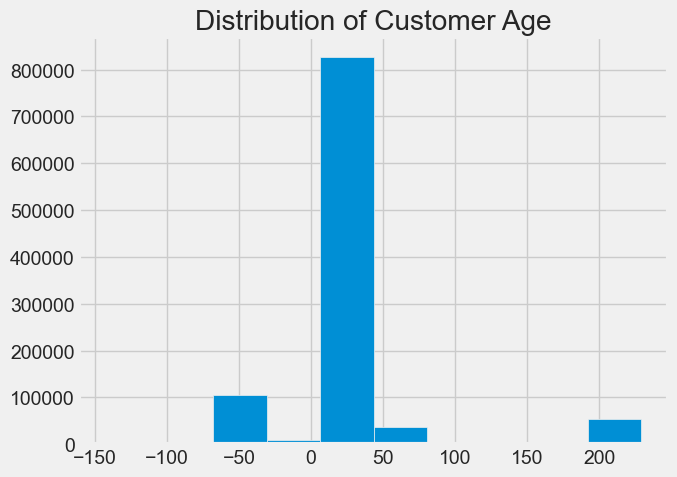

In [25]:
fig,ax=plt.subplots(figsize=(7,5))
ax.hist(x=df['CustomerAge'])
ax.set_title("Distribution of Customer Age")
plt.tight_layout();
plt.show()

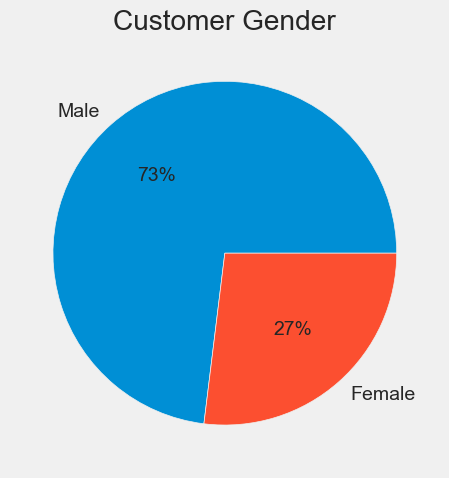

In [24]:
plt.style.use("fivethirtyeight")
fig,ax=plt.subplots(figsize=(7,5))
palette_color = sns.color_palette('rocket')
ax.pie(df['CustGender'].value_counts(),autopct='%1.f%%',labels=['Male','Female'])
ax.set_title("Customer Gender")
plt.tight_layout();
plt.show()

C:\Users\Lee\AppData\Local\Temp\ipykernel_2584\470791954.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart=sns.countplot(y='CustLocation',data=df,palette='rocket', order = df['CustLocation'].value_counts()[:20].index)


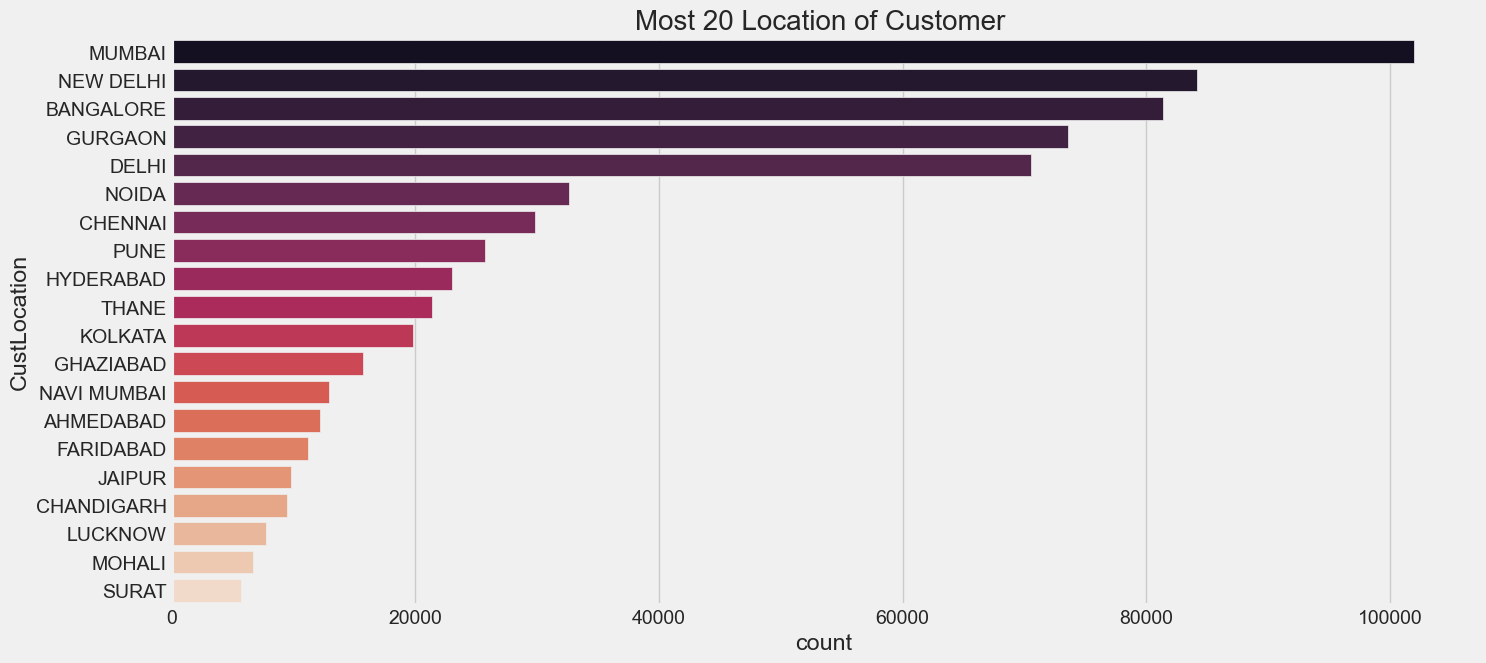

In [27]:
plt.figure(figsize=(15,7))
chart=sns.countplot(y='CustLocation',data=df,palette='rocket', order = df['CustLocation'].value_counts()[:20].index)
plt.title("Most 20 Location of Customer ",
          fontsize='20');

Text(0.5, 1.0, 'Number of transactions in each month')

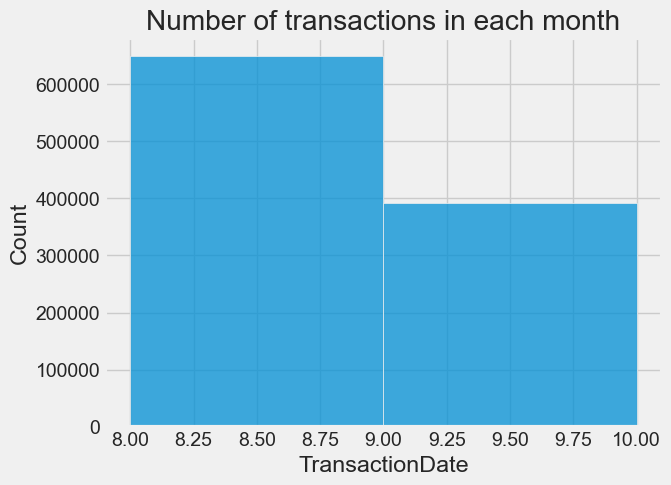

In [61]:
sns.histplot(x = df['TransactionDate'].dt.month, bins = 3, binwidth = 1)
plt.title('Number of transactions in each month')

C:\Users\Lee\AppData\Local\Temp\ipykernel_2584\1572090991.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df['TransactionMonth']).sum().plot(kind='pie', y='TransactionAmount (INR)')


<Axes: ylabel='TransactionAmount (INR)'>

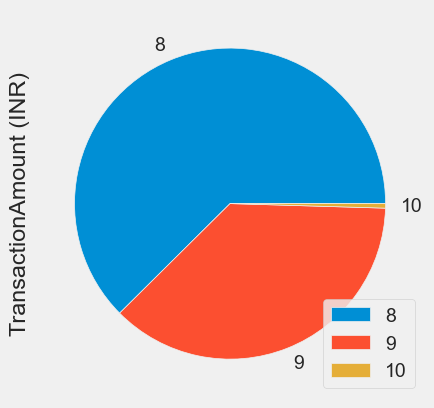

In [59]:
pd.options.plotting.backend = 'matplotlib'
df['TransactionMonth'] = df['TransactionDate'].dt.month
df.groupby(df['TransactionMonth']).sum().plot(kind='pie', y='TransactionAmount (INR)')

<Axes: xlabel='TransactionMonth', ylabel='TransactionAmount (INR)'>

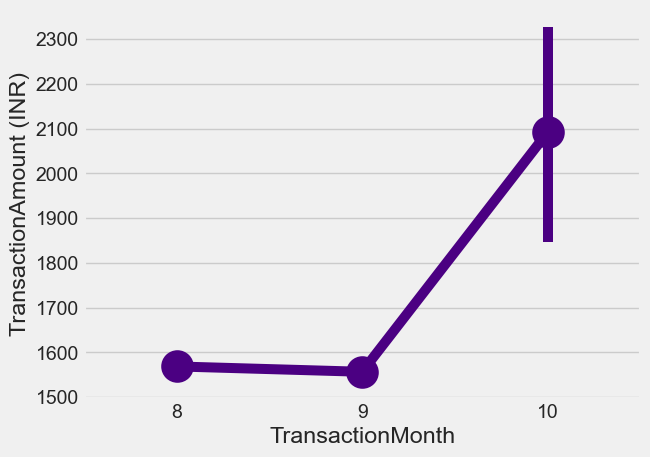

In [87]:
sns.pointplot(data=df,x='TransactionMonth',y='TransactionAmount (INR)',color='indigo')

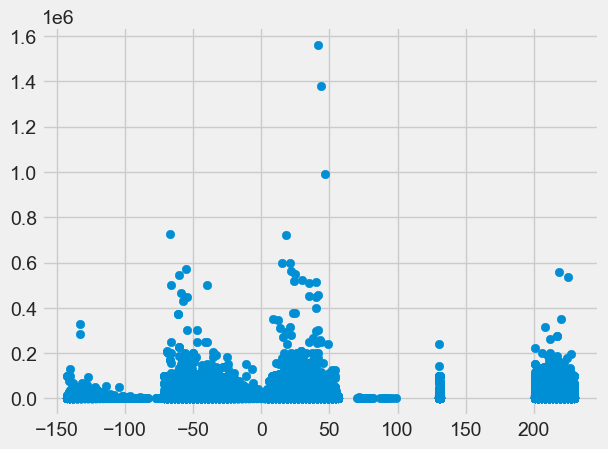

In [86]:
plt.scatter(df['CustomerAge'], df['TransactionAmount (INR)'])

In [62]:
df['DaysSinceTransaction'] = (pd.to_datetime('today') - df['TransactionDate'])/np.timedelta64(1, 'D')
df['DaysSinceTransaction'] = df['DaysSinceTransaction'] - df['DaysSinceTransaction'].min()
temp = df[['CustomerID', 'TransactionID']].groupby(by = 'CustomerID', as_index = False, sort = False).count().reset_index()
temp = temp.drop(columns = 'index')
temp.rename(columns = {'TransactionID' : 'TransactionFrequency'})
df = df.merge(right = temp, on = 'CustomerID')
df.head()


TransactionID_x CustomerID CustomerDateOfBirth CustGender CustLocation  \
0              T1   C5841053          1994-10-01          F   JAMSHEDPUR   
1              T2   C2142763          2057-04-04          M      JHAJJAR   
2              T3   C4417068          1996-11-26          F       MUMBAI   
3              T4   C5342380          1973-09-14          F       MUMBAI   
4         T391139   C5342380          1979-05-29          M       MUMBAI   

   CustAccountBalance TransactionDate  TransactionAmount (INR)  CustomerAge  \
0            17819.05      2002-08-16                     25.0            8   
1             2270.69      2002-08-16                  27999.0          -55   
2            17874.44      2002-08-16                    459.0            6   
3           866503.21      2002-08-16                   2060.0           29   
4             3195.78      2013-08-16                    878.4           34   

   TransactionMonth  TransactionDay  DaysSinceTransaction  TransactionID_y  
0                 8               4                9862.0                1  
1                 8               4                9862.0                1  
2                 8               4                9862.0                1  
3                 8               4                9862.0                2  
4                 8               4                5844.0                2

In [64]:
df = df.rename(columns = {'TransactionID_y' : 'TransactionFrequency',
                         'DaysSinceTransaction' : 'Recency'})
rmf = df.drop(columns = ['CustGender', 'CustLocation', 'CustLocation',
                         'CustAccountBalance', 'CustomerAge']
             ).groupby(by = 'CustomerID').agg({'Recency' : 'min',
                                               'TransactionFrequency': 'first',
                                               'TransactionAmount (INR)' : 'mean'})
df = df.rename(columns = {'TransactionAmount (INR)' : 'AverageTransactionAmount'})
rmf = rmf.rename(columns = {'TransactionAmount (INR)' : 'AverageTransactionAmount'})
rmf.head()

Recency  TransactionFrequency  AverageTransactionAmount
CustomerID                                                         
C1010011     1065.0                     2                    2553.0
C1010012     5479.0                     1                    1499.0
C1010014     8036.0                     2                     727.5
C1010018     5083.0                     1                      30.0
C1010024     4018.0                     1                    5000.0

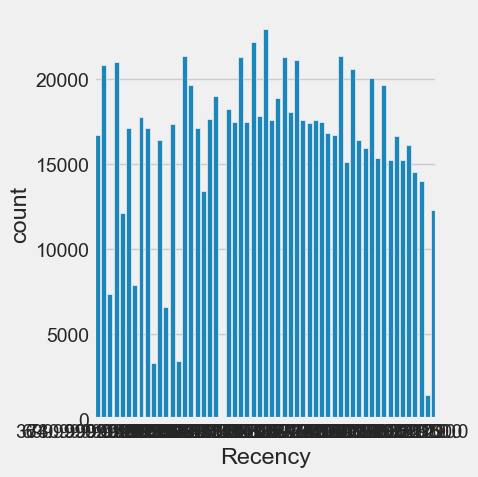

In [66]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = 'Recency', data = rmf, ax = ax)
plt.tight_layout()
plt.show()

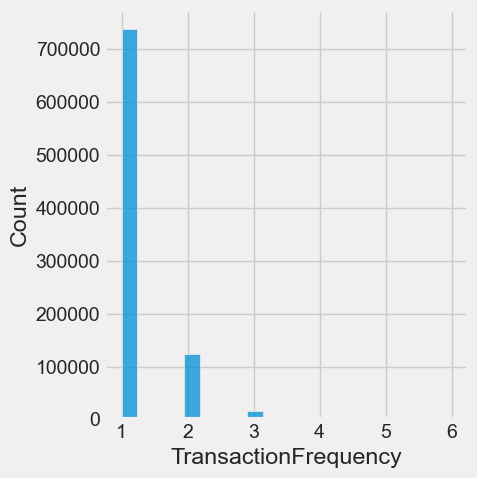

In [69]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.histplot(x = 'TransactionFrequency', data = rmf, ax = ax)
plt.tight_layout()
plt.show()

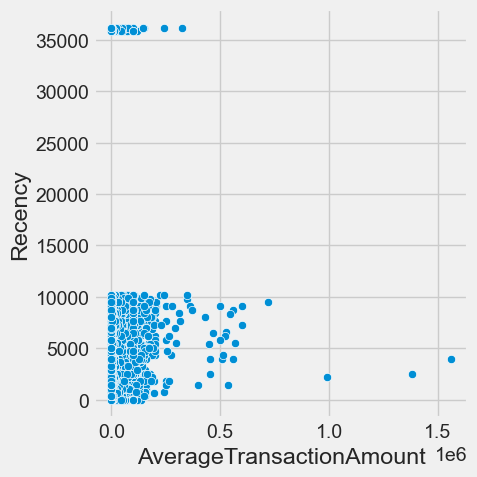

In [70]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.scatterplot(x = 'AverageTransactionAmount', y = 'Recency', data = rmf, ax = ax)
plt.tight_layout()
plt.show()

# Clustering

In [118]:
from sklearn import preprocessing
from sklearn.cluster import KMeans,DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

### Preprocessing

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041613 entries, 0 to 1048566
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041613 non-null  object        
 1   CustomerID               1041613 non-null  object        
 2   CustomerDateOfBirth      1041613 non-null  datetime64[ns]
 3   CustGender               1041613 non-null  int32         
 4   CustLocation             1041613 non-null  int32         
 5   CustAccountBalance       1041613 non-null  float64       
 6   TransactionDate          1041613 non-null  datetime64[ns]
 7   TransactionAmount (INR)  1041613 non-null  float64       
 8   CustomerAge              1041613 non-null  int64         
 9   TransactionMonth         1041613 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int32(2), int64(2), object(2)
memory usage: 79.5+ MB


In [95]:
# Apply label encoder on "CustGender" and "CustLocation" columns
le = preprocessing.LabelEncoder()
  
df['CustGender']= le.fit_transform(df['CustGender'])
df['CustLocation']= le.fit_transform(df['CustLocation'])
df.head()

TransactionID CustomerID CustomerDateOfBirth  CustGender  CustLocation  \
0            T1   C5841053          1994-10-01           0          3557   
1            T2   C2142763          2057-04-04           1          3618   
2            T3   C4417068          1996-11-26           0          5219   
3            T4   C5342380          1973-09-14           0          5219   
4            T5   C9031234          1988-03-24           0          5606   

   CustAccountBalance TransactionDate  TransactionAmount (INR)  CustomerAge  \
0            17819.05      2002-08-16                     25.0            8   
1             2270.69      2002-08-16                  27999.0          -55   
2            17874.44      2002-08-16                    459.0            6   
3           866503.21      2002-08-16                   2060.0           29   
4             6714.43      2002-08-16                   1762.5           14   

   TransactionMonth  
0                 8  
1                 8  
2                 8  
3                 8  
4                 8

In [97]:
df = df.drop(['TransactionID','CustomerID','CustomerDateOfBirth','TransactionDate'],axis=1)
df

CustGender  CustLocation  CustAccountBalance  \
0                 0          3557            17819.05   
1                 1          3618             2270.69   
2                 0          5219            17874.44   
3                 0          5219           866503.21   
4                 0          5606             6714.43   
...             ...           ...                 ...   
1048562           1          5738             7635.19   
1048563           1          5580            27311.42   
1048564           1          3367           221757.06   
1048565           1          9059            10117.87   
1048566           1          6656            75734.42   

         TransactionAmount (INR)  CustomerAge  TransactionMonth  
0                           25.0            8                 8  
1                        27999.0          -55                 8  
2                          459.0            6                 8  
3                         2060.0           29                 8  
4                         1762.5           14                 8  
...                          ...          ...               ...  
1048562                    799.0           28                 9  
1048563                    460.0           26                 9  
1048564                    770.0           29                 9  
1048565                   1000.0           40                 9  
1048566                   1166.0           34                 9  

[1041613 rows x 6 columns]

In [99]:
df[df['TransactionAmount (INR)'] == 0].count()

CustGender                 820
CustLocation               820
CustAccountBalance         820
TransactionAmount (INR)    820
CustomerAge                820
TransactionMonth           820
dtype: int64

In [100]:
df = df.drop(df[df['TransactionAmount (INR)'] == 0].index,axis = 0)

In [101]:
df[df['TransactionAmount (INR)'] == 0].count()

CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionAmount (INR)    0
CustomerAge                0
TransactionMonth           0
dtype: int64

In [102]:
# Apply Normalization method "Standard scaler"
s = StandardScaler()
columns_names=['CustGender','CustLocation','CustAccountBalance','TransactionAmount (INR)','CustomerAge','TransactionMonth']
df = s.fit_transform(df)
df = pd.DataFrame(df,columns=columns_names)
df.head()

CustGender  CustLocation  CustAccountBalance  TransactionAmount (INR)  \
0   -1.646425     -0.223738           -0.114717                -0.234970   
1    0.607376     -0.197927           -0.133086                 4.026871   
2   -1.646425      0.479512           -0.114652                -0.168850   
3   -1.646425      0.479512            0.887937                 0.075063   
4   -1.646425      0.643265           -0.127836                 0.029739   

   CustomerAge  TransactionMonth  
0    -0.360371         -0.771889  
1    -1.577868         -0.771889  
2    -0.399022         -0.771889  
3     0.045461         -0.771889  
4    -0.244419         -0.771889

In [104]:
# Use these two variables
X = df[['CustomerAge','TransactionAmount (INR)']].values
Y = df[['CustLocation','TransactionAmount (INR)']].values

### 1. Centroid-based clustering: k-means

In [107]:
kmeans_x = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
x_kmeans = kmeans_x.fit_predict(X)

C:\Users\Lee\miniconda3\envs\p5002\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [108]:
kmeans_y = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans = kmeans_y.fit_predict(Y)

C:\Users\Lee\miniconda3\envs\p5002\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [109]:
centroids_x = kmeans_x.cluster_centers_
centroids_y = kmeans_y.cluster_centers_

print(centroids_x,centroids_y)

[[-1.93621755e-02 -1.14750077e-01]
 [ 3.53933294e+00  9.26272580e-02]
 [ 2.84799562e-01  6.31720527e+00]
 [-1.57350059e+00 -3.56238273e-02]
 [ 3.41783613e-01  1.99399203e+02]
 [ 4.71020320e-03  6.38378323e+01]
 [-2.15602339e-01  1.89071265e+00]
 [ 6.92514260e-01  1.58102330e+01]] [[ 6.53921646e-01 -6.77785658e-02]
 [-1.20423560e+00 -8.36515913e-02]
 [ 2.06443675e-02  3.84271099e+00]
 [ 4.50597767e-01  1.99399203e+02]
 [ 1.74145703e+00 -8.68217313e-02]
 [ 8.27033963e-02  6.38378323e+01]
 [-3.25008220e-01 -8.16859011e-02]
 [-8.93657054e-02  1.45888009e+01]]


In [110]:
df['cluster_age_km'] = x_kmeans
df['cluster_location_km'] = y_kmeans
df.head()

CustGender  CustLocation  CustAccountBalance  TransactionAmount (INR)  \
0   -1.646425     -0.223738           -0.114717                -0.234970   
1    0.607376     -0.197927           -0.133086                 4.026871   
2   -1.646425      0.479512           -0.114652                -0.168850   
3   -1.646425      0.479512            0.887937                 0.075063   
4   -1.646425      0.643265           -0.127836                 0.029739   

   CustomerAge  TransactionMonth  cluster_age_km  cluster_location_km  
0    -0.360371         -0.771889               0                    6  
1    -1.577868         -0.771889               6                    2  
2    -0.399022         -0.771889               0                    0  
3     0.045461         -0.771889               0                    0  
4    -0.244419         -0.771889               0                    0

In [111]:
# get centroids
cen_xx = [i[0] for i in centroids_x] 
cen_xy = [i[1] for i in centroids_x]

cen_yx = [i[0] for i in centroids_y] 
cen_yy = [i[1] for i in centroids_y]

## add to df
df['cen_xx'] = df.cluster_age_km.map({0:cen_xx[0], 1:cen_xx[1], 2:cen_xx[2],3:cen_xx[3], 4:cen_xx[4], 5:cen_xx[5],6:cen_xx[6], 7:cen_xx[7]})
df['cen_xy'] = df.cluster_age_km.map({0:cen_xy[0], 1:cen_xy[1], 2:cen_xy[2],3:cen_xy[3], 4:cen_xy[4], 5:cen_xy[5],6:cen_xy[6], 7:cen_xy[7]})

df['cen_yx'] = df.cluster_location_km.map({0:cen_yx[0], 1:cen_yx[1], 2:cen_yx[2],3:cen_yx[3], 4:cen_yx[4], 5:cen_yx[5],6:cen_yx[6], 7:cen_yx[7]})
df['cen_yy'] = df.cluster_location_km.map({0:cen_yy[0], 1:cen_yy[1], 2:cen_yy[2],3:cen_yy[3], 4:cen_yy[4], 5:cen_yy[5],6:cen_yy[6], 7:cen_yy[7]})

# define and map colors
colors = ['red', 'yellow', 'grey', 'green','blue','orange','pink','brown']
df['color_age_km'] = df.cluster_age_km.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3],4:colors[4],5:colors[5],6:colors[6],7:colors[7]})
df['color_location_km'] = df.cluster_location_km.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3],4:colors[4],5:colors[5],6:colors[6],7:colors[7]})

(-0.5, 20.0)

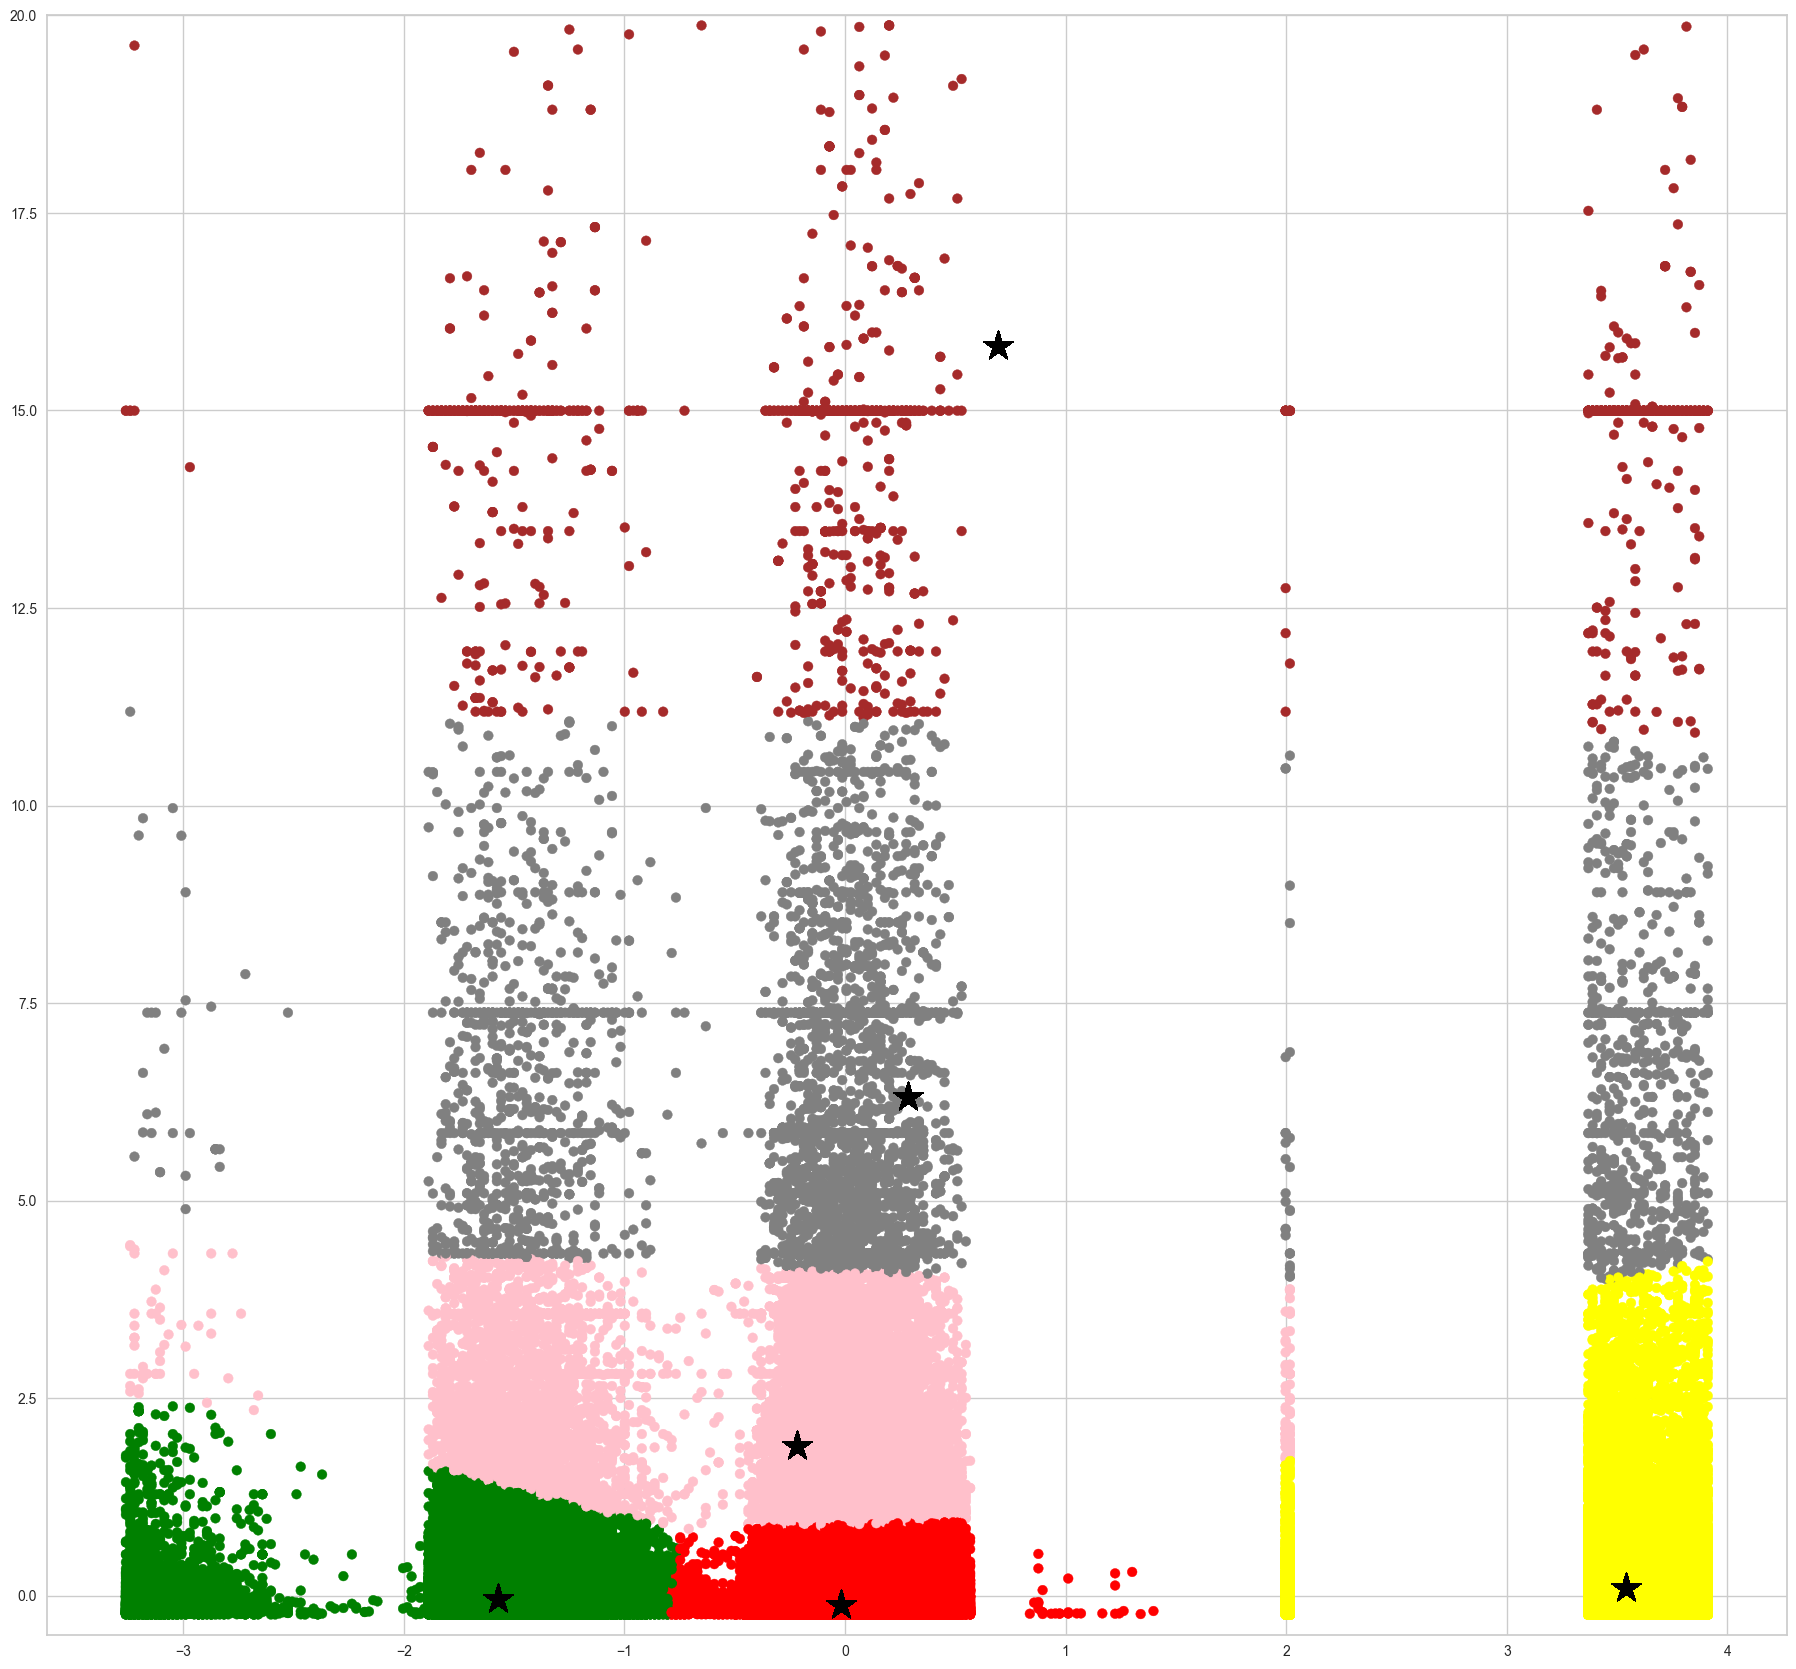

In [113]:
plt.figure(num=None, figsize=(20, 20), facecolor='w', edgecolor='k')
plt.scatter(df['CustomerAge'], df['TransactionAmount (INR)'], c=df.color_age_km)
plt.scatter(df['cen_xx'], df['cen_xy'],marker = '*',s=500, c='black')
#plt.xlim([0, 100])
plt.ylim([-0.5, 20])

(-0.5, 20.0)

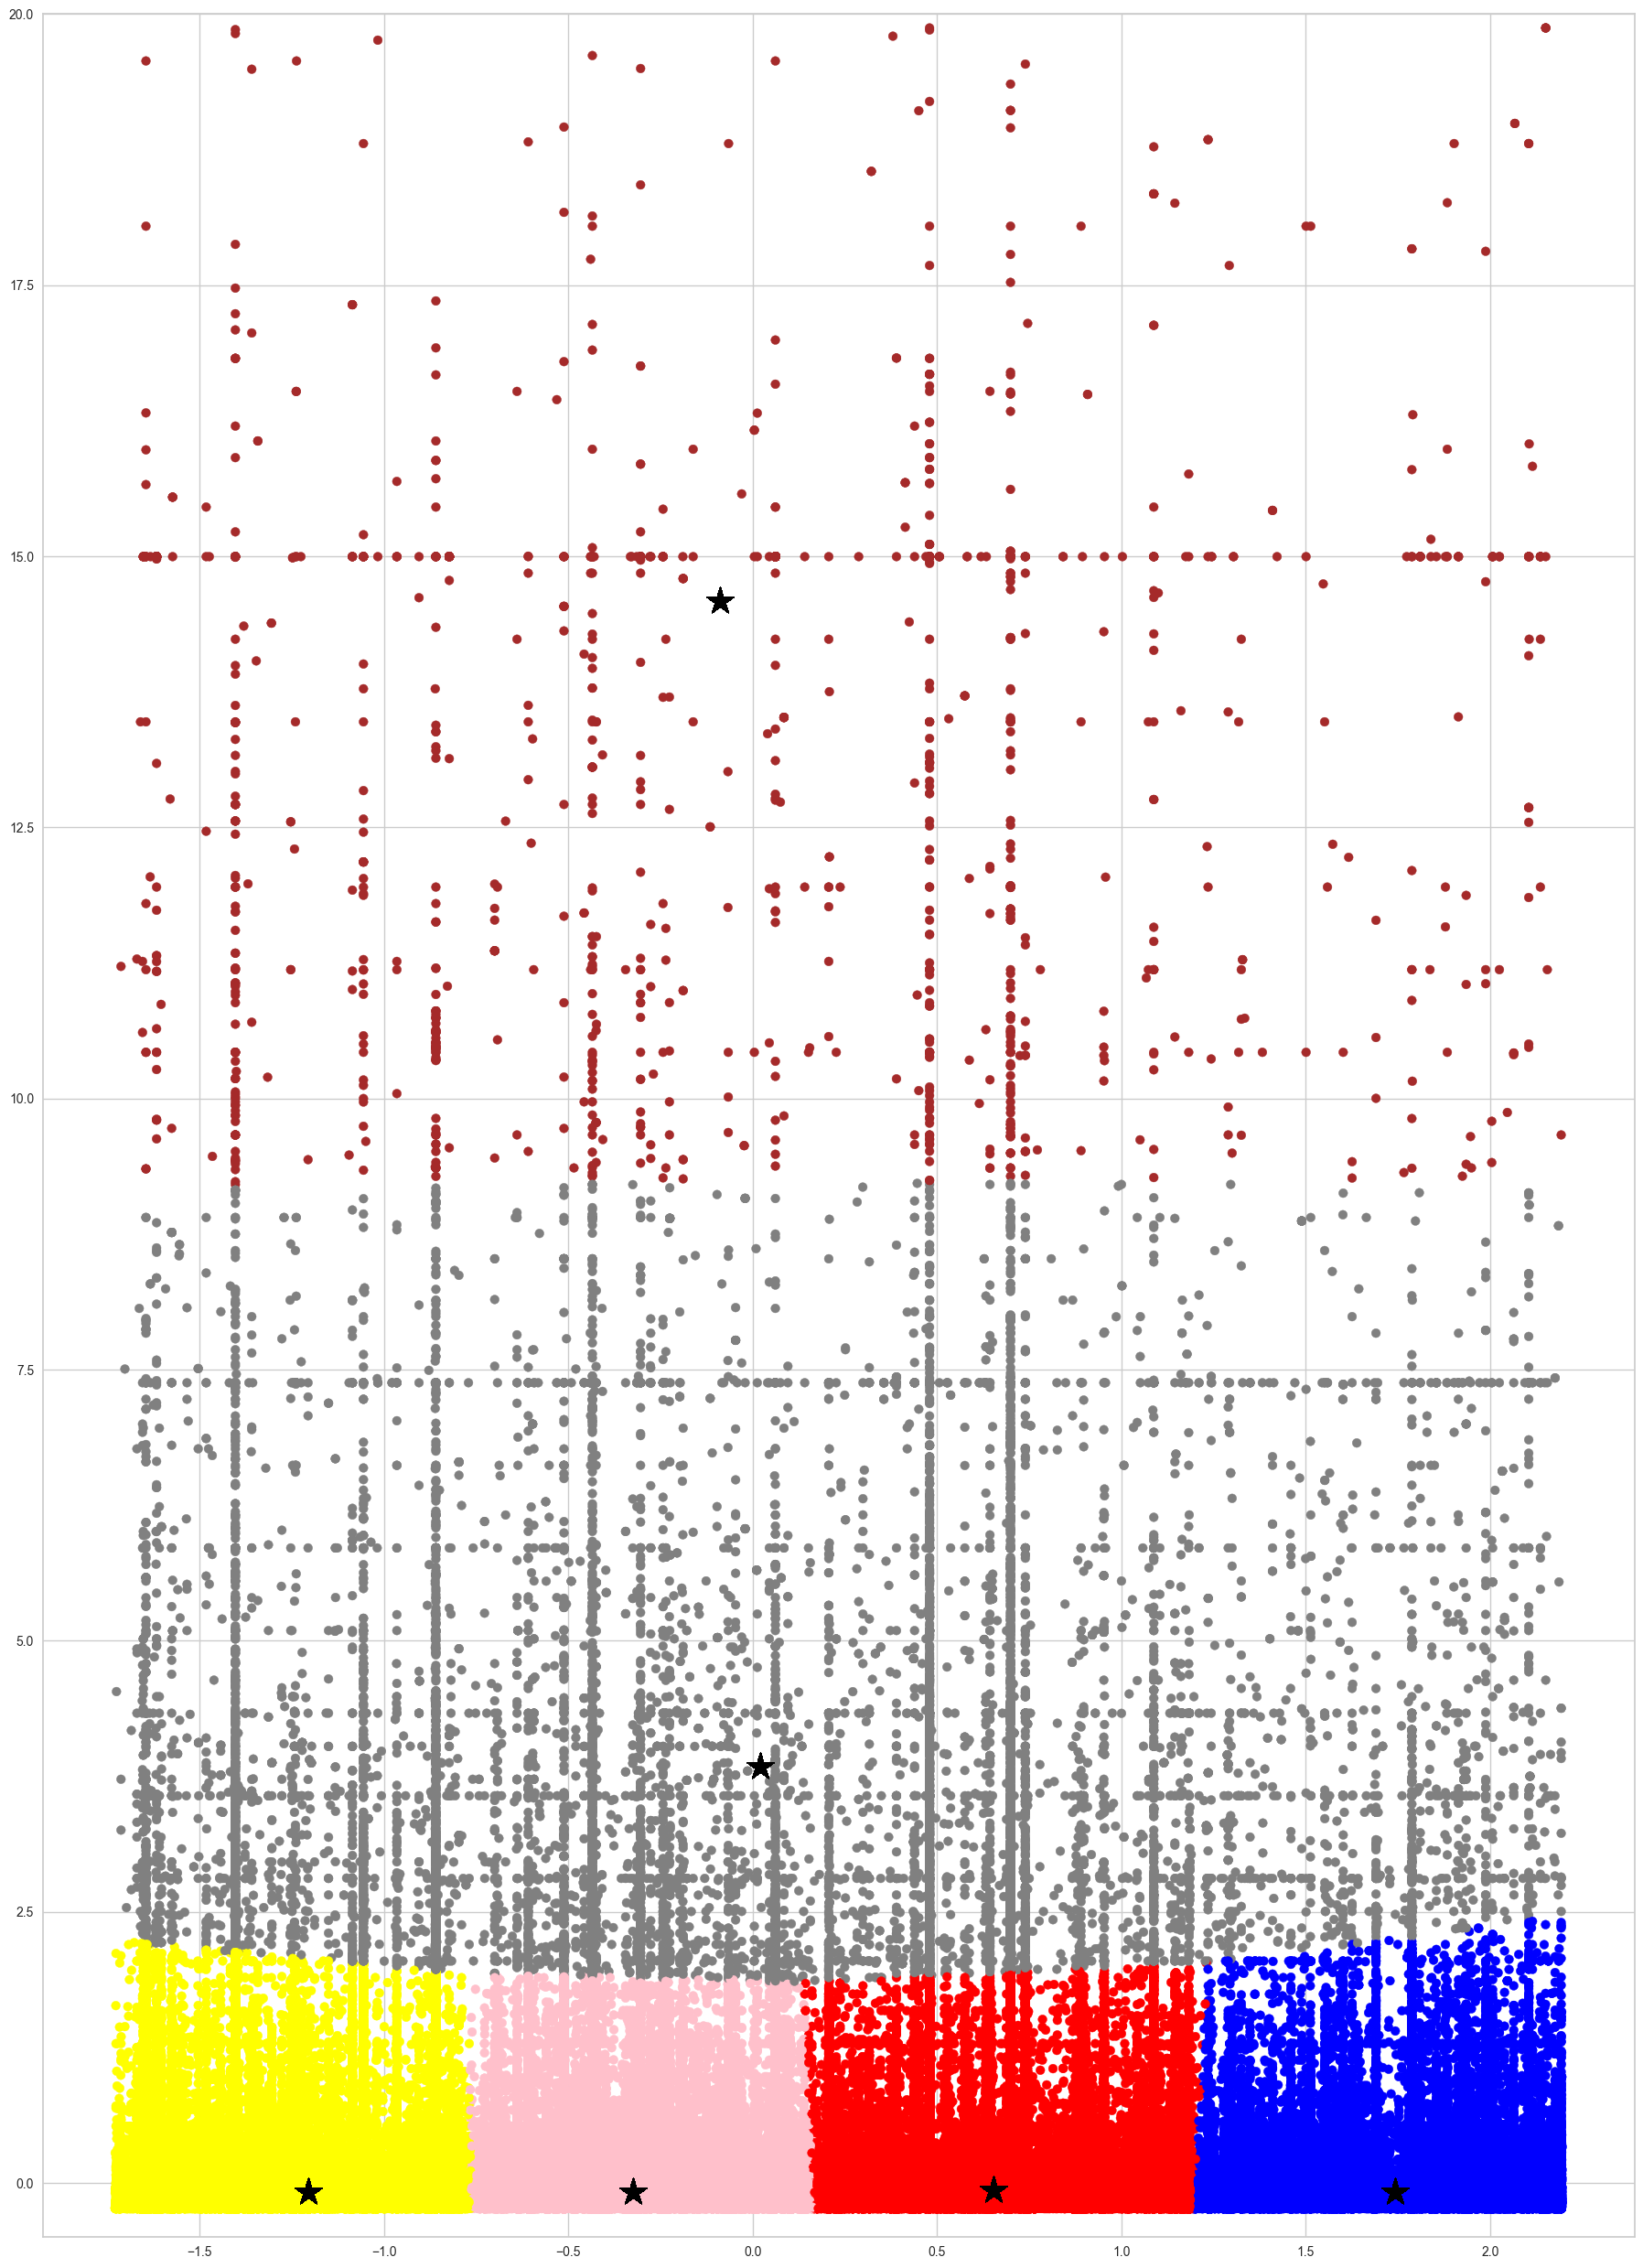

In [114]:
plt.figure(num=None, figsize=(20, 30), facecolor='w', edgecolor='k')
plt.scatter(df['CustLocation'], df['TransactionAmount (INR)'], c=df.color_location_km)
plt.scatter(df['cen_yx'], df['cen_yy'],marker = '*',s=500, c='black')
#plt.xlim([0, 8500])
plt.ylim([-0.5, 20])

### 2. Hierarchical clustering: Agglomerative

In [121]:
X_H = pd.DataFrame(X).sample(20000)
Y_H = pd.DataFrame(Y).sample(20000)

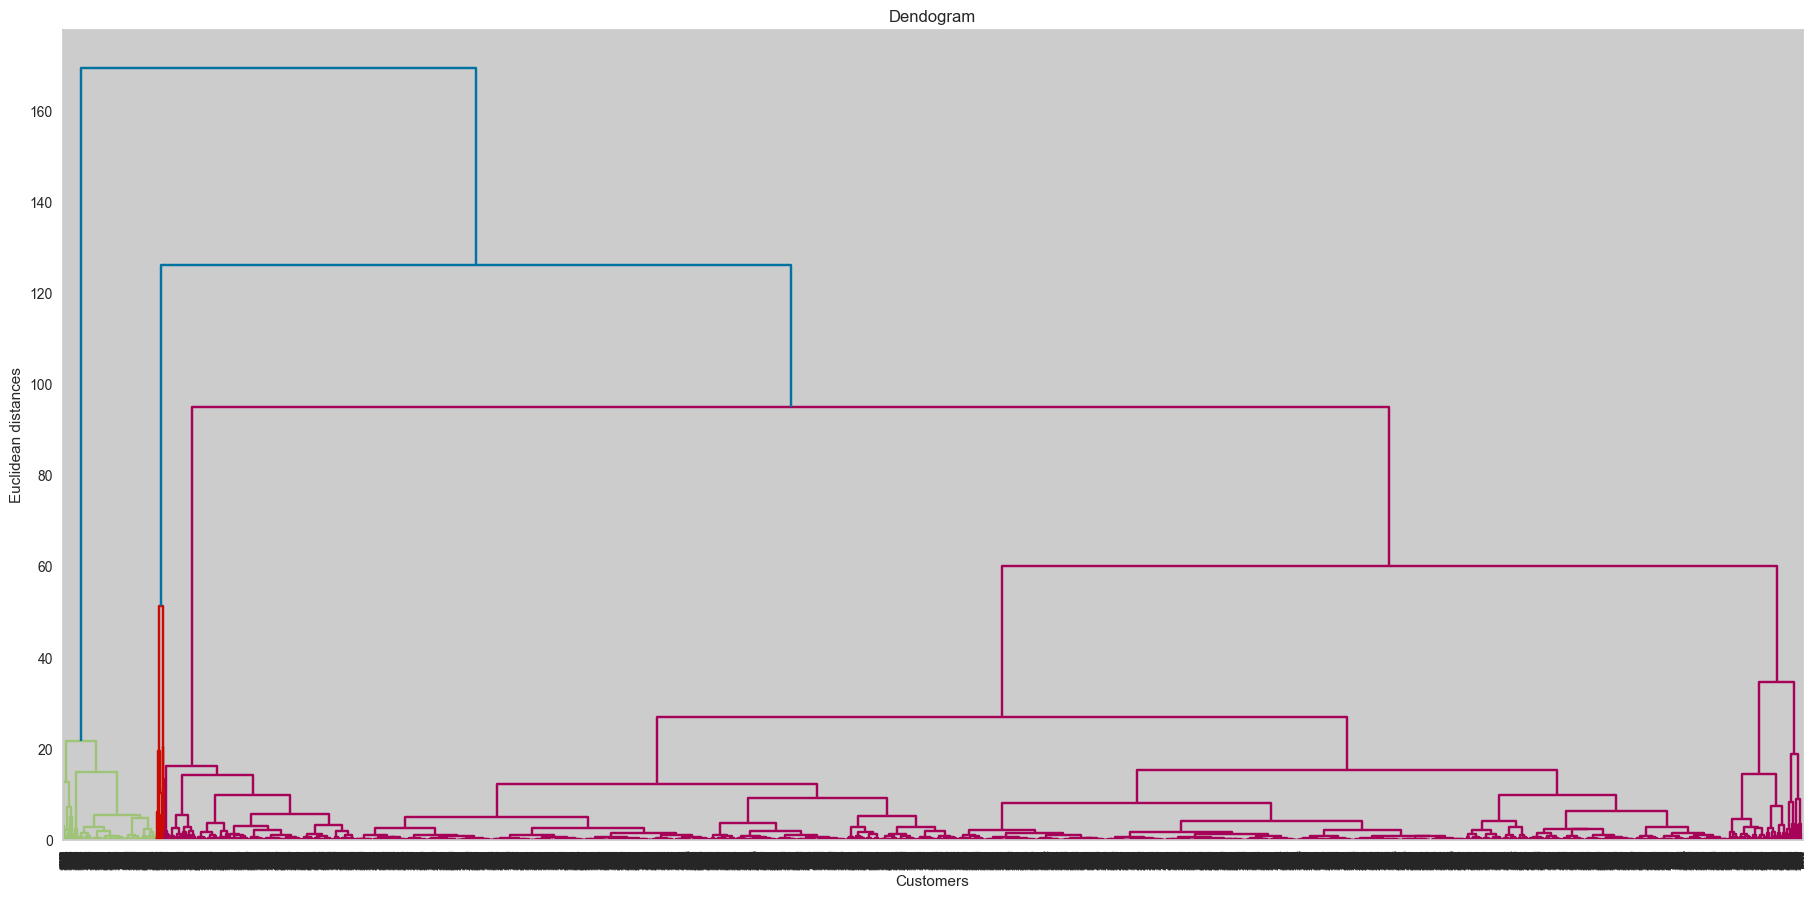

In [122]:
plt.figure(figsize=(20, 10))
dendogram_age = sch.dendrogram(sch.linkage(X_H, method='ward'))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [124]:
unique_colors_age = set(dendogram_age['color_list'])
num_clusters_age = len(unique_colors_age)-1
cluster_age = AgglomerativeClustering(n_clusters=num_clusters_age, affinity='euclidean', linkage='ward')
cluster_age.fit_predict(X_H)

C:\Users\Lee\miniconda3\envs\p5002\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

(-0.5, 6.0)

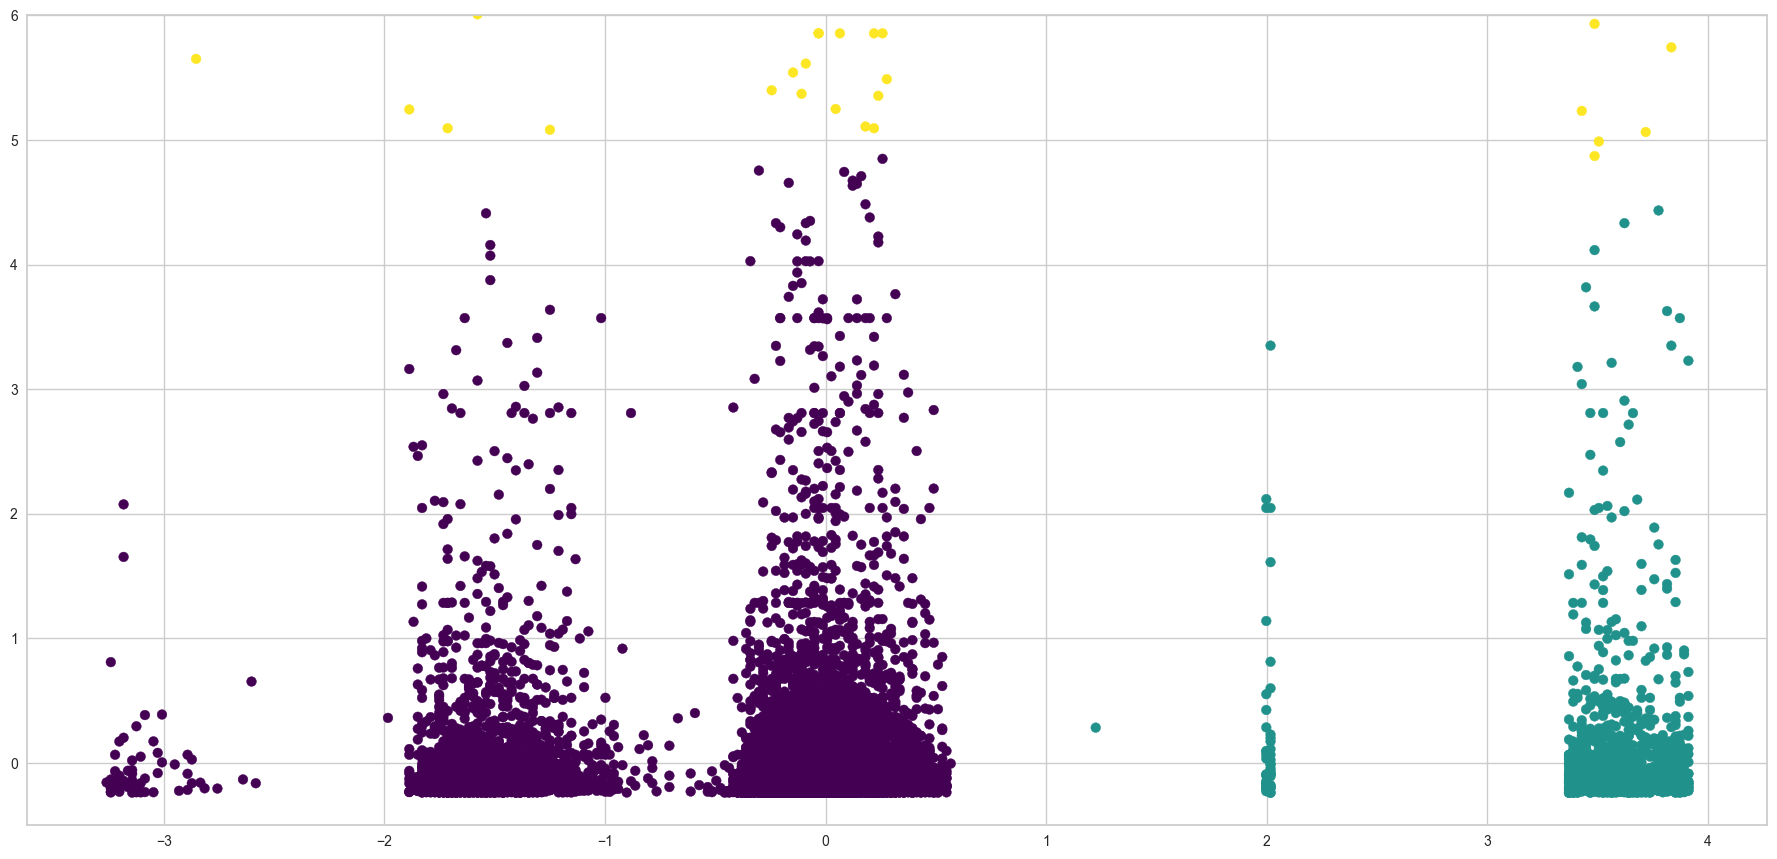

In [125]:
plt.figure(num=None, figsize=(20, 10), facecolor='w', edgecolor='k')
plt.scatter(X_H[0], X_H[1], c=cluster_age.labels_, cmap='viridis');
#plt.xlim(-1,1.5)
plt.ylim(-0.5,6)

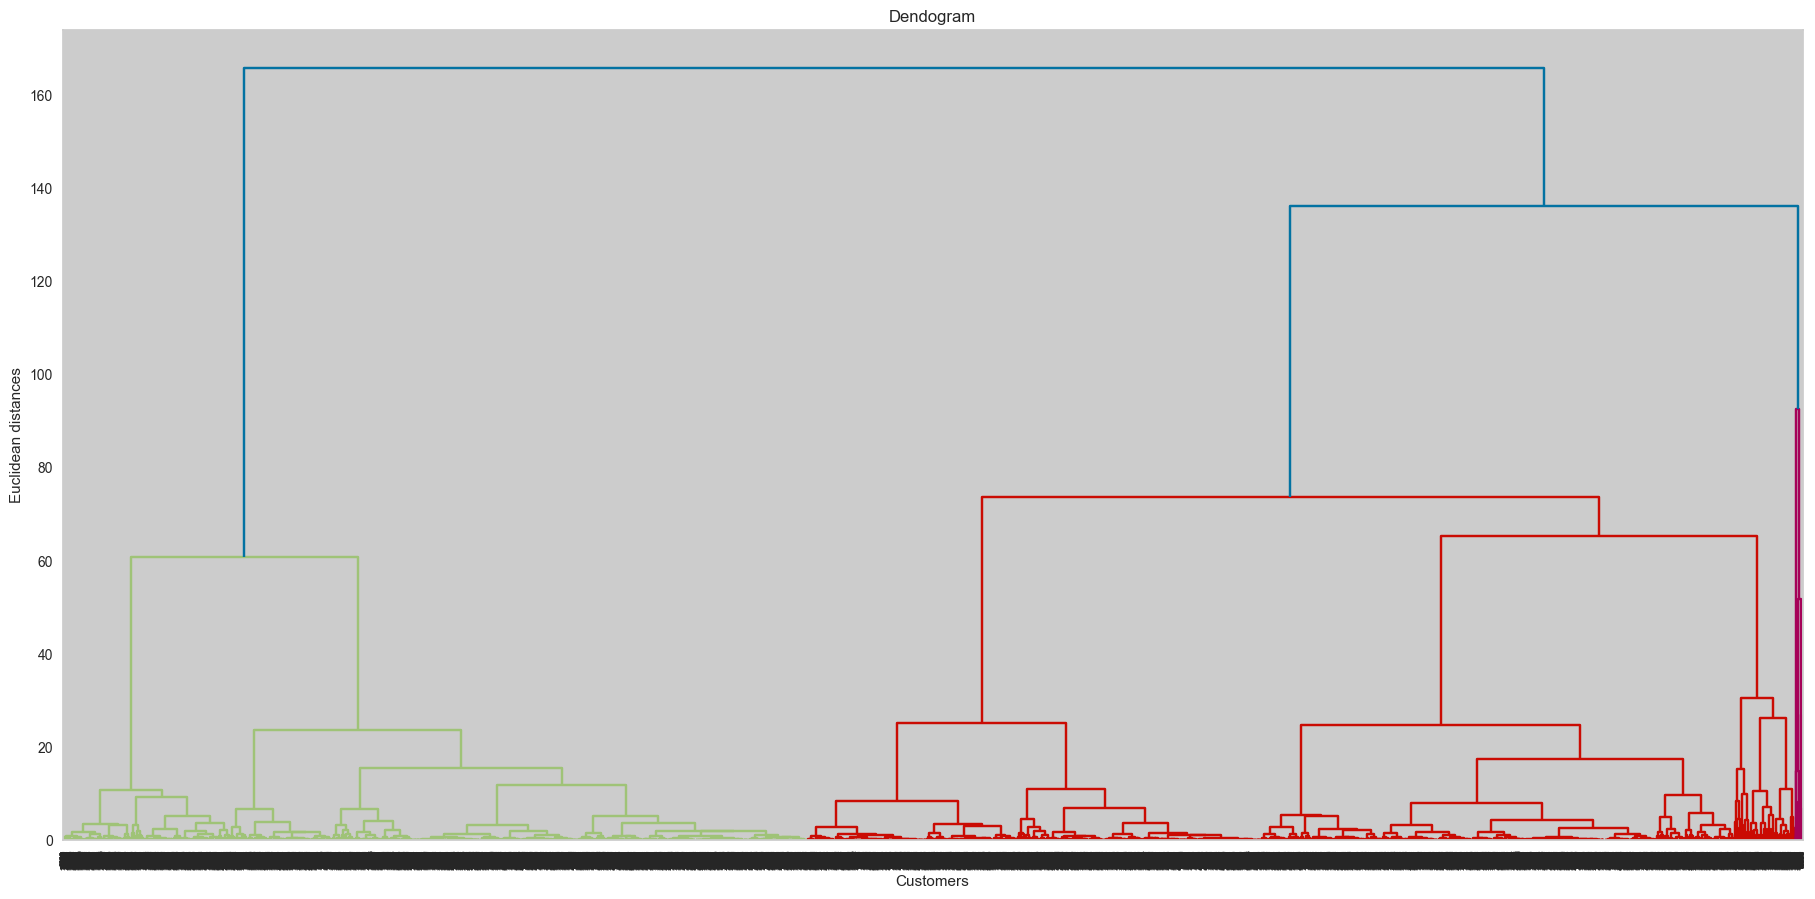

In [126]:
plt.figure(figsize=(20, 10))

dendogram_loc = sch.dendrogram(sch.linkage(Y_H, method='ward'))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [128]:
unique_colors_loc = set(dendogram_loc['color_list'])
num_clusters_loc = len(unique_colors_loc)-1
cluster_loc = AgglomerativeClustering(n_clusters=num_clusters_loc, affinity='euclidean', linkage='ward')
cluster_loc.fit_predict(Y_H)

C:\Users\Lee\miniconda3\envs\p5002\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 2, 2, ..., 2, 2, 1], dtype=int64)

(-0.25, 10.0)

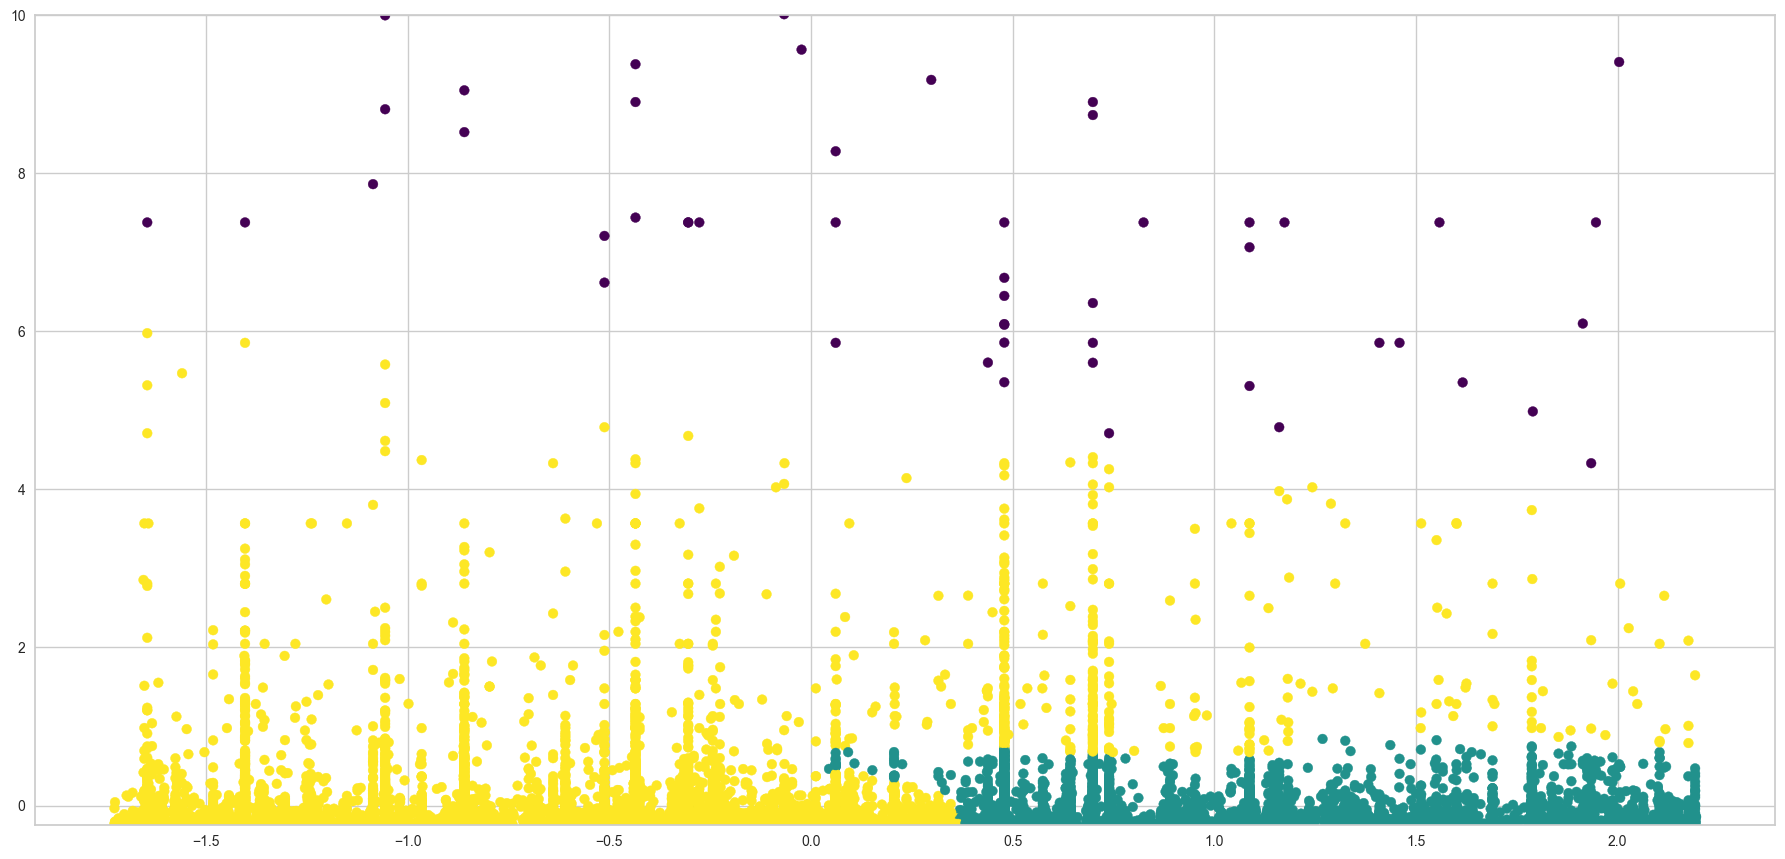

In [129]:
plt.figure(num=None, figsize=(20, 10), facecolor='w', edgecolor='k')
plt.scatter(Y_H[0], Y_H[1], c=cluster_loc.labels_, cmap='viridis');
#plt.xlim(-1,1.5)
plt.ylim(-0.25,10)

### 3. Density-based clustering: DBSCAN

In [130]:
dbscan_cluster_x = DBSCAN(eps=0.0006, min_samples=8)
dbscan_cluster_x.fit(X)
dbscan_cluster_y = DBSCAN(eps=0.0036, min_samples=8)
dbscan_cluster_y.fit(Y)

DBSCAN(eps=0.0036, min_samples=8)

(-0.25, 0.5)

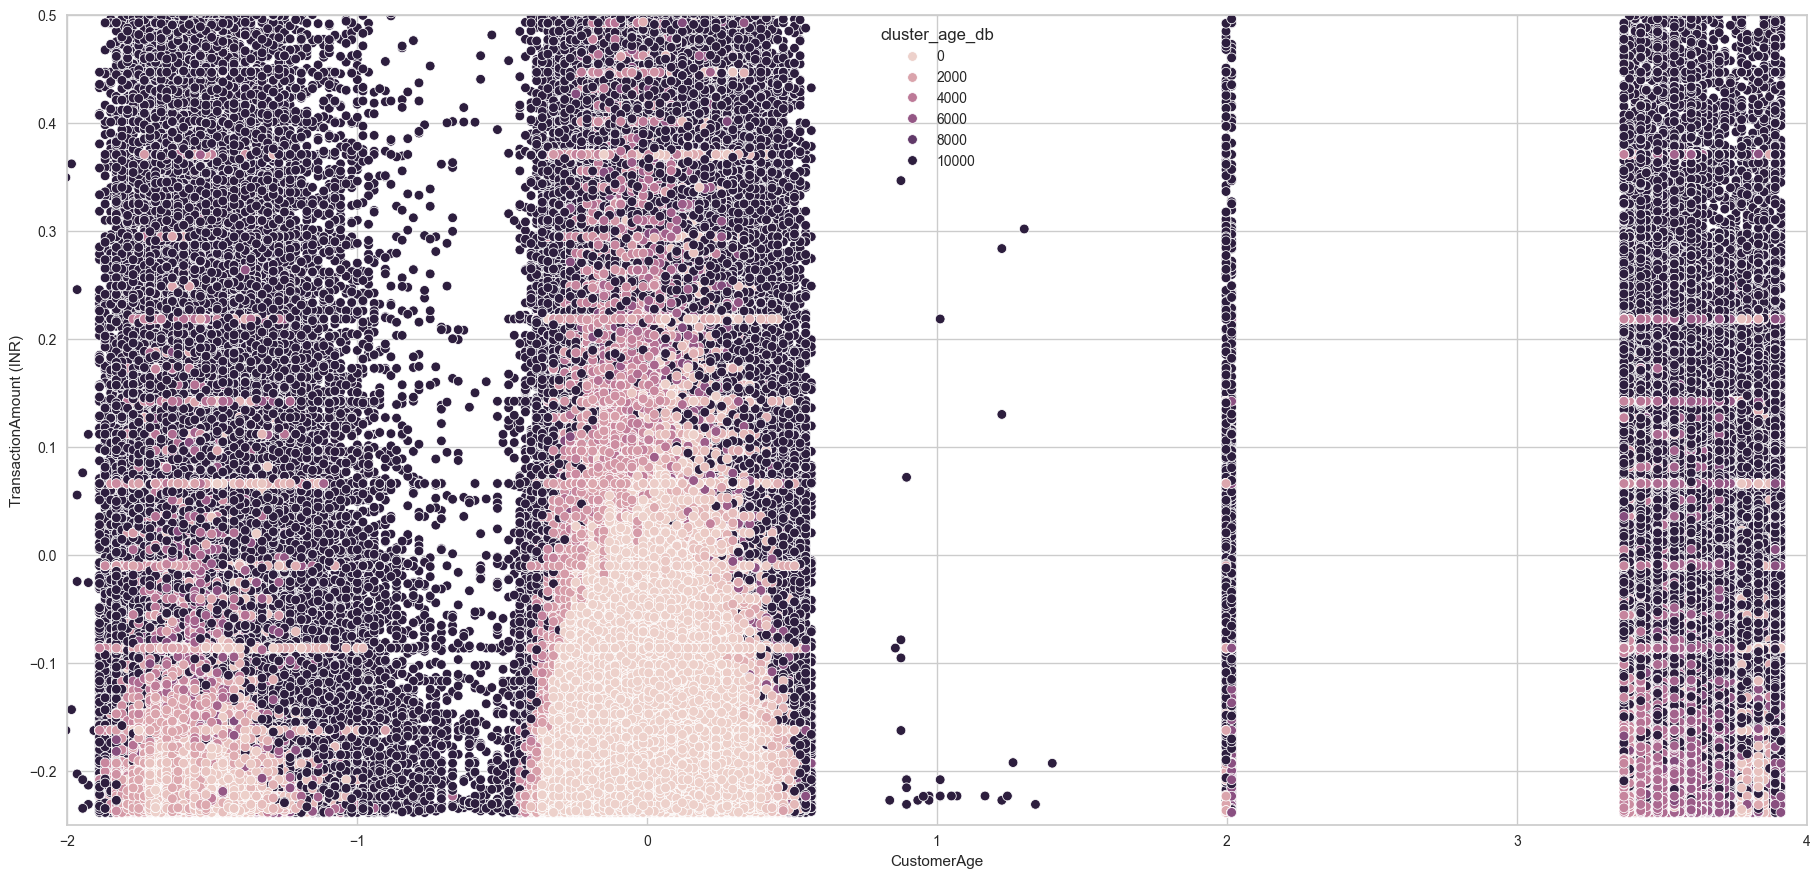

In [132]:
labels_age=dbscan_cluster_x.labels_
    
df['cluster_age_db'] = labels_age
df.loc[df.cluster_age_db == -1, 'cluster_age_db'] = 10000
df.cluster_age_db.nunique()

plt.figure(num=None, figsize=(20, 10), facecolor='w', edgecolor='k')
sns.scatterplot(x=df['CustomerAge'], y= df['TransactionAmount (INR)'], hue=df["cluster_age_db"])
plt.xlim([-2,4])
plt.ylim([-0.25,0.5])

(-0.25, 1.0)

C:\Users\Lee\miniconda3\envs\p5002\lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Lee\miniconda3\envs\p5002\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


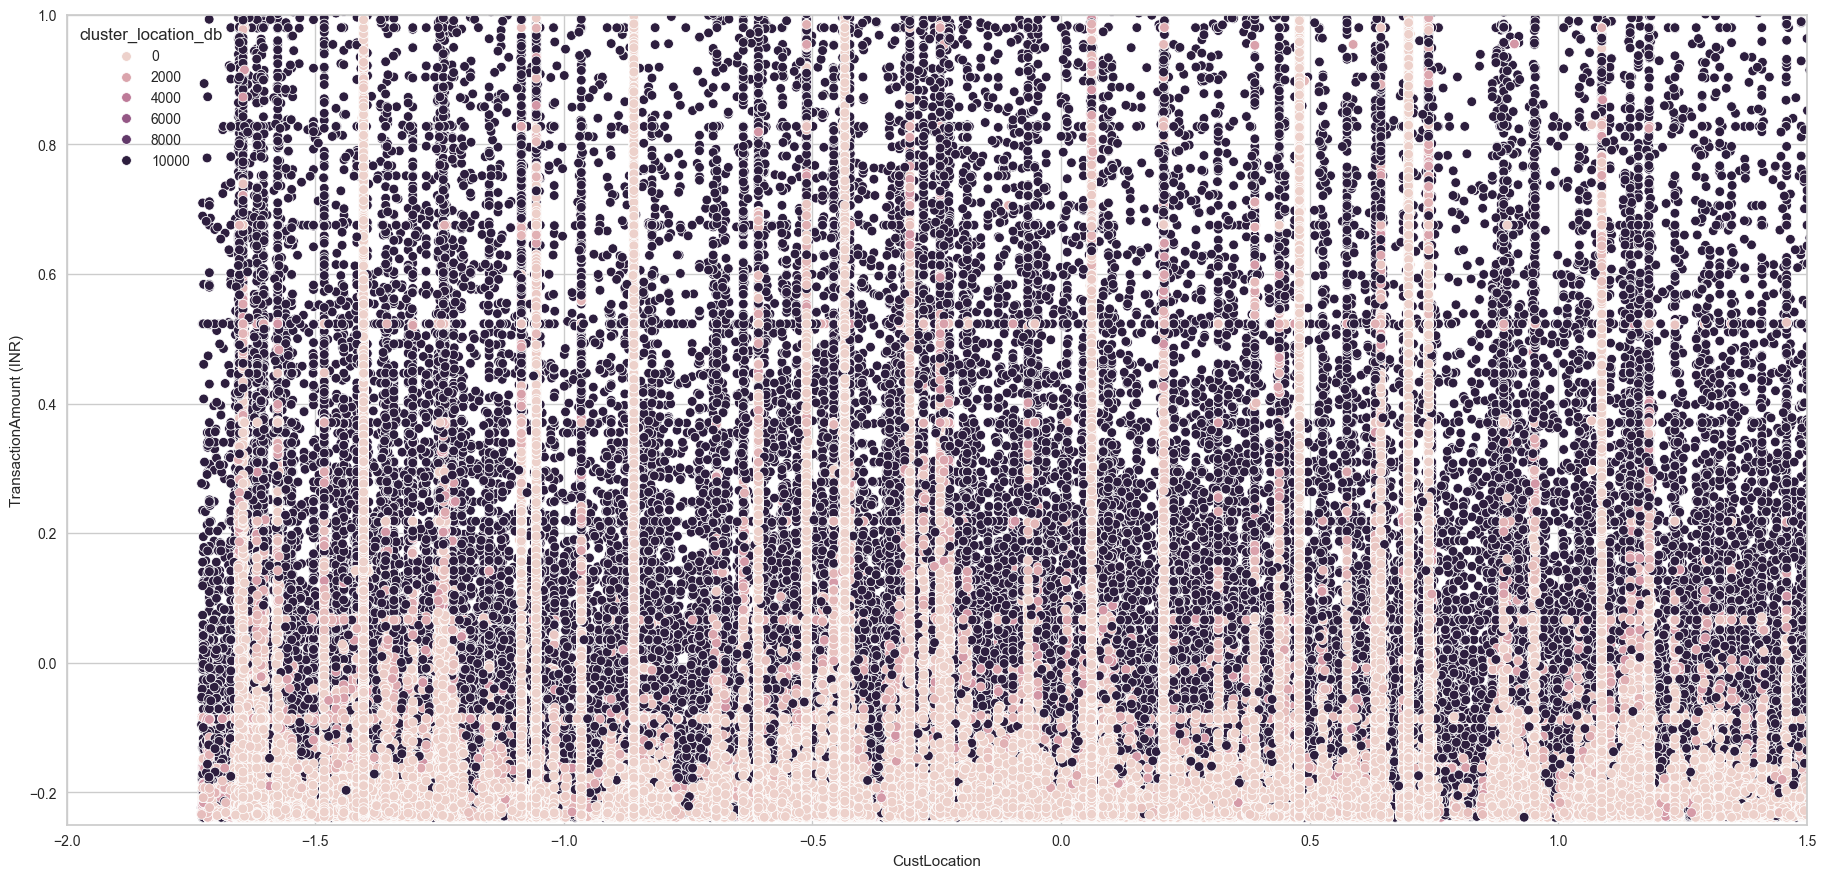

In [133]:
labels_location=dbscan_cluster_y.labels_
    
df['cluster_location_db'] = labels_location
df.loc[df.cluster_location_db == -1, 'cluster_location_db'] = 10000
df.cluster_location_db.value_counts()

plt.figure(num=None, figsize=(20, 10), facecolor='w', edgecolor='k')
sns.scatterplot(x=df['CustLocation'], y= df['TransactionAmount (INR)'], hue=df["cluster_location_db"])
plt.xlim([-2,1.5])
plt.ylim([-0.25,1])